In [1]:
pip install --upgrade typing_extensions


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
data = pd.read_csv("WineQT.csv")
print("Dataset loaded successfully!")
print(data.head())
print("\nColumns:", data.columns)


Dataset loaded successfully!
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1    

In [5]:
data = pd.read_csv("WineQT.csv")
print("Dataset loaded successfully!")
print(data.head())
print("\nColumns:", data.columns)


Dataset loaded successfully!
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1    

In [ ]:
print(data.isnull().sum())

# Drop any rows with missing data (if found)
data = data.dropna()

# Create binary quality label
data['label'] = data['quality'].apply(lambda q: 1 if q >= 7 else 0)

X = data.drop(['quality', 'label', 'Id'], axis=1)  # Drop Id if it exists
y = data['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 914, Testing samples: 229


In [9]:
model = Sequential([
    Dense(12, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=10,
    validation_split=0.2,
    verbose=1
)



Epoch 1/50


74/74 [==============================] - 3s 10ms/step - loss: 0.5721 - accuracy: 0.7565 - val_loss: 0.4756 - val_accuracy: 0.8470
Epoch 2/50
74/74 [==============================] - 0s 4ms/step - loss: 0.4125 - accuracy: 0.8605 - val_loss: 0.3858 - val_accuracy: 0.8415
Epoch 3/50
74/74 [==============================] - 0s 4ms/step - loss: 0.3425 - accuracy: 0.8591 - val_loss: 0.3534 - val_accuracy: 0.8470
Epoch 4/50
74/74 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8591 - val_loss: 0.3405 - val_accuracy: 0.8470
Epoch 5/50
74/74 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.8591 - val_loss: 0.3338 - val_accuracy: 0.8470
Epoch 6/50
74/74 [==============================] - 0s 3ms/step - loss: 0.2850 - accuracy: 0.8577 - val_loss: 0.3323 - val_accuracy: 0.8470
Epoch 7/50
74/74 [==============================] - 0s 3ms/step - loss: 0.2775 - accuracy: 0.8605 - val_loss: 0.3321 - val_accuracy: 0.8470
Epoch 8/50
74/74

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


8/8 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9083

Test Accuracy: 90.83%


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

comparison = np.concatenate((y_pred[:10], np.array(y_test[:10]).reshape(-1,1)), axis=1)
print("Predicted vs Actual:\n", comparison)


8/8 [==============================] - 0s 1ms/step
Predicted vs Actual:
 [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


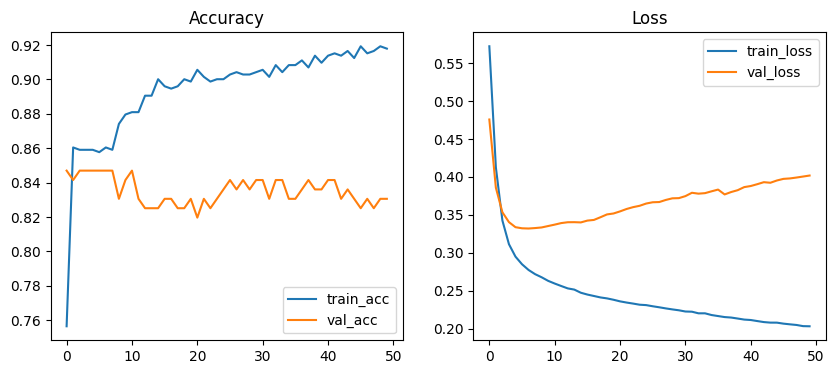

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()


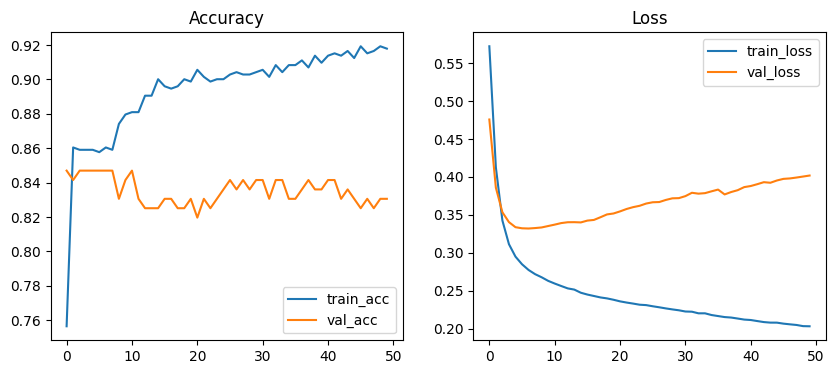

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()


In [ ]:
# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities (0–1) into binary output (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

comparison = np.concatenate(
    (y_pred[:10], np.array(y_test[:10]).reshape(-1, 1)), axis=1
)

print("Predicted vs Actual (1=Good, 0=Bad):")
print(comparison)


8/8 [==============================] - 0s 2ms/step
Predicted vs Actual (1=Good, 0=Bad):
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
#FORWARD 

In [ ]:
import tensorflow as tf

# Select a small batch for illustration
X_sample = tf.convert_to_tensor(X_train[:5], dtype=tf.float32)
y_sample = tf.convert_to_tensor(y_train[:5], dtype=tf.float32)

# Each layer transforms input to output through activation functions
layer_outputs = []
input_data = X_sample

for layer in model.layers:
    input_data = layer(input_data)     # output of this layer becomes input for next
    layer_outputs.append(input_data)

# Final output (prediction probabilities)
y_pred = layer_outputs[-1]

print("🔹 Forward Propagation Results:")
for i, out in enumerate(layer_outputs):
    print(f"Layer {i+1} output shape: {out.shape}")

print("\nPredicted probabilities (sigmoid output):")
print(y_pred.numpy())


🔹 Forward Propagation Results:
Layer 1 output shape: (5, 12)
Layer 2 output shape: (5, 8)
Layer 3 output shape: (5, 1)

Predicted probabilities (sigmoid output):
[[0.02431287]
 [0.71651787]
 [0.4061654 ]
 [0.00475938]
 [0.00154077]]


In [ ]:
#BACKWARD

In [ ]:
loss_fn = tf.keras.losses.BinaryCrossentropy()

with tf.GradientTape() as tape:
    y_pred = model(X_sample, training=True)     # forward pass
    loss_value = loss_fn(y_sample, y_pred)      # compute loss

# Compute gradients of loss w.r.t each trainable variable (weights, biases)
gradients = tape.gradient(loss_value, model.trainable_variables)

print("🔹 Backward Propagation Results:")
print("Loss value:", float(loss_value))
for i, grad in enumerate(gradients[:4]):
    print(f"  Gradient {i+1} shape: {grad.shape}")


🔹 Backward Propagation Results:
Loss value: 1.1009635925292969
  Gradient 1 shape: (11, 12)
  Gradient 2 shape: (12,)
  Gradient 3 shape: (12, 8)
  Gradient 4 shape: (8,)


In [ ]:
import tensorflow as tf

# Prepare a small batch (5 samples)
X_batch = tf.convert_to_tensor(X_train[:5], dtype=tf.float32)
y_batch = tf.convert_to_tensor(y_train[:5], dtype=tf.float32)

# Define loss and optimizer
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

with tf.GradientTape() as tape:
    # Compute predicted outputs (forward pass)
    y_pred_before = model(X_batch, training=True)
    loss_before = loss_fn(y_batch, y_pred_before)

# Capture gradients before update
grads_before = tape.gradient(loss_before, model.trainable_variables)

# Apply gradients (updates weights)
optimizer.apply_gradients(zip(grads_before, model.trainable_variables))

# Compute new predictions after weight update
y_pred_after = model(X_batch, training=False)
loss_after = loss_fn(y_batch, y_pred_after)

print("🔹 Forward–Backward Comparison\n")
print(f"Loss before backpropagation:  {float(loss_before):.6f}")
print(f"Loss after  backpropagation:  {float(loss_after):.6f}\n")

# Compare first few predicted probabilities before and after
print("Predicted probabilities before update:")
print(y_pred_before.numpy().flatten()[:5])

print("\nPredicted probabilities after update:")
print(y_pred_after.numpy().flatten()[:5])

# Check gradient magnitudes (for one layer)
first_grad = grads_before[0].numpy()
print("\nMean absolute gradient (layer 1 weights):", np.mean(np.abs(first_grad)))


🔹 Forward–Backward Comparison

Loss before backpropagation:  1.100964
Loss after  backpropagation:  0.902660

Predicted probabilities before update:
[0.02431287 0.71651787 0.4061654  0.00475938 0.00154077]

Predicted probabilities after update:
[0.03848028 0.5730476  0.32865167 0.0042237  0.00191056]

Mean absolute gradient (layer 1 weights): 0.0994401
